In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [2]:
from thesis_tools.utils.data import *
from thesis_tools.models.bayesian_cross_sectional import *

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
df = read_billionaires_data()
# filter US 2018
y_data = df[(df['country_of_citizenship'] == 'United States') & (df['year'] == "2018")]['net_worth']

In [4]:
model = GeneralisedPareto_One_Stage(y_data)

In [5]:
fit = model.fit()

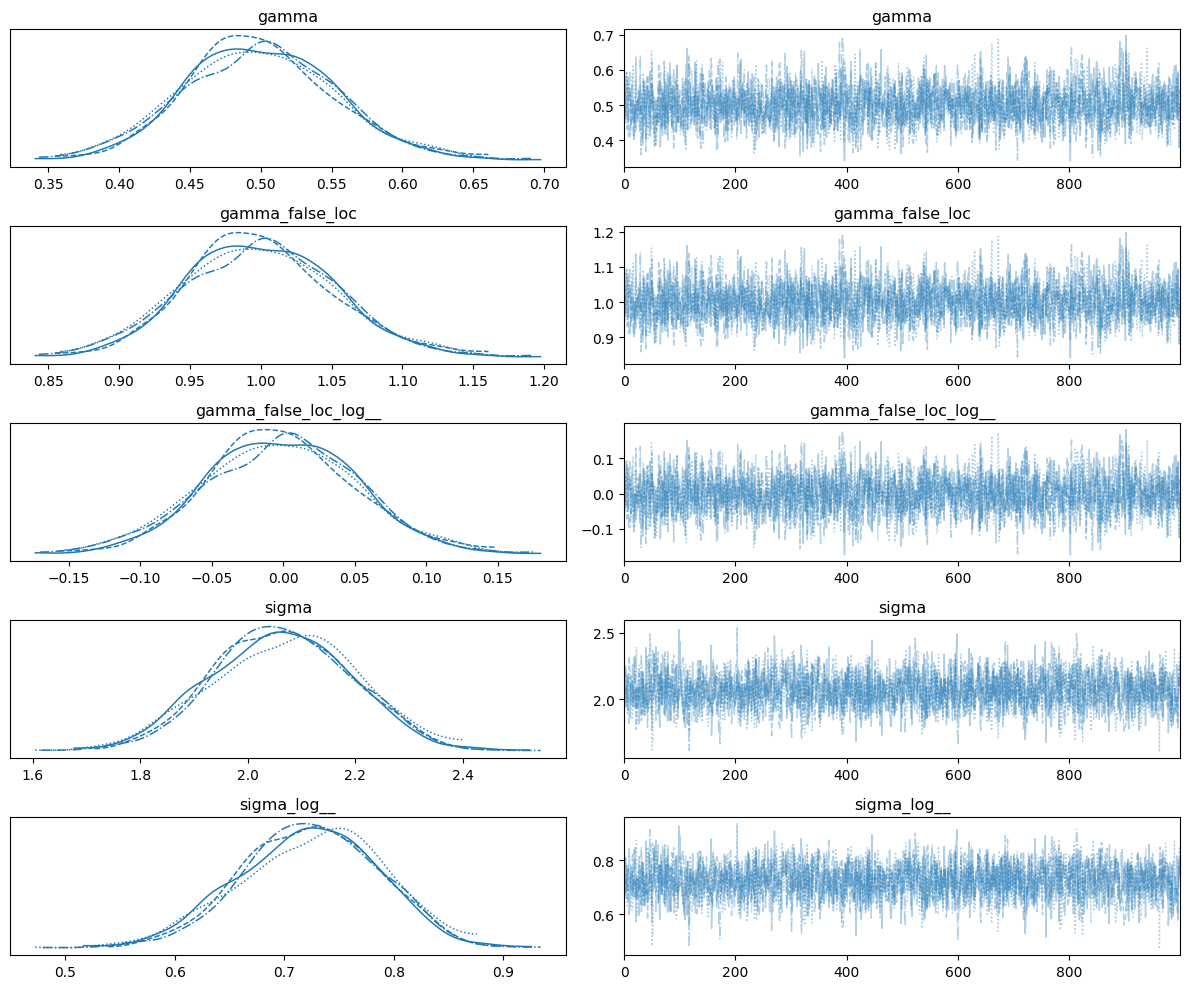

In [6]:
az.plot_trace(fit)
plt.tight_layout()

In [7]:
posterior = model.posterior_predictive()

Sampling: [y]


Output()

(array([388.,  96.,  47.,  25.,  13.,   6.,   6.,   3.,   2.,   1.,   2.,
          1.,   0.,   1.,   0.,   0.,   1.,   0.,   2.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.00039672,   3.77480574,   6.54921477,   9.32362379,
         12.09803282,  14.87244185,  17.64685087,  20.4212599 ,
         23.19566893,  25.97007795,  28.74448698,  31.51889601,
         34.29330503,  37.06771406,  39.84212309,  42.61653211,
         45.39094114,  48.16535017,  50.93975919,  53.71416822,
         56.48857725,  59.26298627,  62.0373953 ,  64.81180433,
         67.58621335,  70.36062238,  73.1350314 ,  75.90944043,
         78.68384946,  81.45825848,  84.23266751,  87.00707654,
         89.78148556,  92.55589459,  95.33030362,  98.10471264,
        100.87912167, 103.6535307 , 106.42793972, 109.20234875,
        111.976757

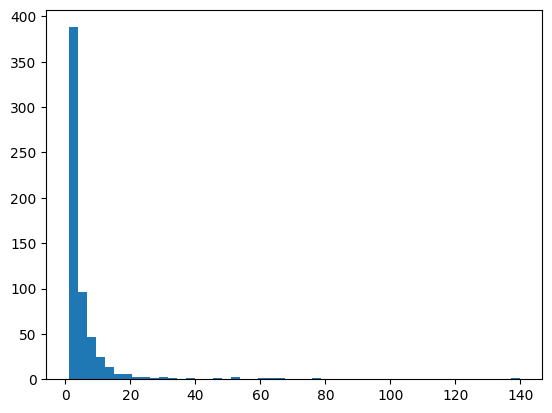

In [12]:
plt.hist(posterior[1:600], bins=50)

(array([2.00000e+00, 3.00000e+00, 4.00000e+00, 8.00000e+00, 1.20000e+01,
        1.80000e+01, 2.80000e+01, 4.60000e+01, 7.00000e+01, 9.00000e+01,
        1.57000e+02, 2.33000e+02, 4.47000e+02, 6.07000e+02, 9.76000e+02,
        1.55800e+03, 2.37800e+03, 3.75000e+03, 5.98200e+03, 9.27500e+03,
        1.45520e+04, 2.25600e+04, 3.47120e+04, 5.24390e+04, 7.84320e+04,
        1.15050e+05, 1.61568e+05, 2.16366e+05, 2.69684e+05, 3.03929e+05,
        3.04469e+05, 2.65643e+05, 2.00503e+05, 1.30565e+05, 7.46990e+04,
        3.92410e+04, 1.85250e+04, 8.57900e+03, 3.86500e+03, 1.72600e+03,
        7.29000e+02, 2.85000e+02, 1.27000e+02, 6.90000e+01, 1.90000e+01,
        8.00000e+00, 4.00000e+00, 6.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([-12.75373053, -12.3048499 , -11.85596927, -11.40708864,
        -10.958208  , -10.50932737, -10.06044674,  -9.61156611,
         -9.16268548,  -8.71380485,  -8.26492421,  -7.81604358,
         -7.36716295,  -6.91828232,  -6.46940169,  -6.02052105,
         -5.

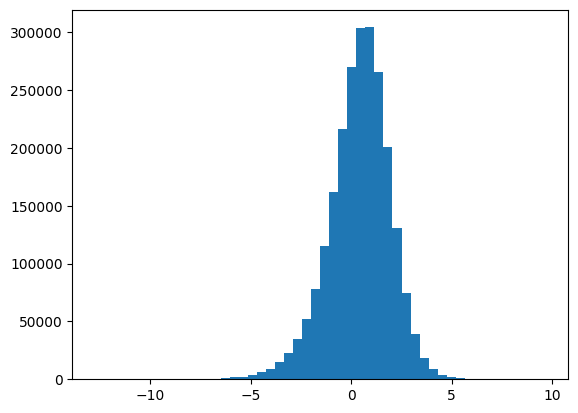

In [24]:
# histogram of the posterior
plt.hist(np.log(posterior-1), bins=50)

(array([17.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 21.,  0.,  0., 15.,  0., 21., 18.,
        17., 22., 28., 30., 37., 42., 59., 45., 60., 39., 35., 16., 16.,
         6., 11.,  6.,  7.,  2.,  1.,  2.,  6.,  3.,  2.,  2.]),
 array([-6.90775528, -6.67540939, -6.4430635 , -6.21071761, -5.97837172,
        -5.74602583, -5.51367994, -5.28133405, -5.04898816, -4.81664227,
        -4.58429638, -4.35195049, -4.1196046 , -3.88725871, -3.65491282,
        -3.42256693, -3.19022104, -2.95787515, -2.72552926, -2.49318337,
        -2.26083748, -2.02849159, -1.7961457 , -1.56379981, -1.33145392,
        -1.09910803, -0.86676214, -0.63441625, -0.40207036, -0.16972448,
         0.06262141,  0.2949673 ,  0.52731319,  0.75965908,  0.99200497,
         1.22435086,  1.45669675,  1.68904264,  1.92138853,  2.15373442,
         2.38608031,  2.6184262 ,  2.85077209,  3.08311798,  3.31546387,
         3.54780976,  3.78015565,  4.01250154,  4.24484743,

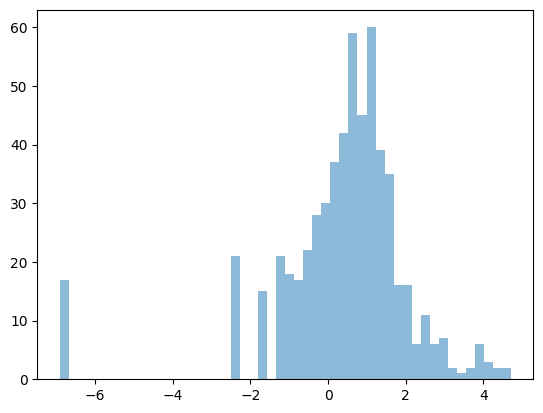

In [23]:
plt.hist(np.log(y_data-0.999), bins=50, alpha=0.5)

In [13]:
prior = model.prior_predictive()

Sampling: [gamma_false_loc, sigma, y]


(array([ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  2.,  0.,  2.,  1.,
         3.,  2.,  2.,  4.,  3.,  3., 14., 14., 10., 11., 21., 20., 29.,
        37., 36., 38., 50., 57., 53., 72., 60., 57., 64., 45., 55., 50.,
        36., 36., 24., 26., 18.,  7., 12.,  6.,  8.,  1.,  5.]),
 array([-8.61643616, -8.38031703, -8.14419789, -7.90807876, -7.67195962,
        -7.43584049, -7.19972135, -6.96360222, -6.72748308, -6.49136395,
        -6.25524481, -6.01912568, -5.78300654, -5.54688741, -5.31076827,
        -5.07464914, -4.83853   , -4.60241087, -4.36629173, -4.13017259,
        -3.89405346, -3.65793432, -3.42181519, -3.18569605, -2.94957692,
        -2.71345778, -2.47733865, -2.24121951, -2.00510038, -1.76898124,
        -1.53286211, -1.29674297, -1.06062384, -0.8245047 , -0.58838557,
        -0.35226643, -0.1161473 ,  0.11997184,  0.35609097,  0.59221011,
         0.82832924,  1.06444838,  1.30056752,  1.53668665,  1.77280579,
         2.00892492,  2.24504406,  2.48116319,  2.71728233,

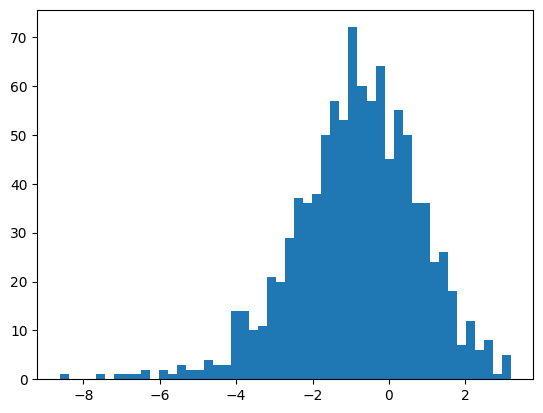

In [20]:
plt.hist(np.log(prior.prior_predictive['y'].values.flatten()[1:1000]-1), bins=50)